In [1]:
import pandas as pd
import datetime as dt

In [2]:
df=pd.read_excel(r"C:\Users\abdulmuiz.adewale\OneDrive - Tolaram Pte Ltd\Project Done\Data\uncleaned bike sales data.xlsx")
df.head()

,Sales_Order #,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product_Description,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,261695,2021-12-01,1.0,December,2021,39,Adults (35-64),F,United States,California,Bikes,Mountain Bikes,"Mountain-200 Black, 46",4.0,1252,2295,4172,5008,9180
1,261695,2021-12-01,1.0,December,2021,44,Adults (35-64),M,United Kingdom,England,Bikes,Mountain Bikes,"Mountain-200 Silver, 42",1.0,1266,2320,1054,1266,2320
2,261697,2021-12-02,2.0,December,2021,37,Adults (35-64),M,United States,California,Bikes,Mountain Bikes,"Mountain-400-W Silver, 46",2.0,420,769,698,840,1538
3,261698,2021-12-02,2.0,December,2021,31,Young Adults (25-34),F,Australia,New South Wales,Bikes,Mountain Bikes,"Mountain-400-W Silver, 42",1.0,420,769,349,420,769
4,261699,2021-12-03,3.0,December,2021,37,Adults (35-64),F,United States,California,Bikes,Mountain Bikes,"Mountain-200 Black, 46",2.0,0,2295,2086,0,4590


In [3]:
#converting to datetime format
df['Date']= pd.to_datetime(df['Date'])

#striffing to a custom format
df['Date']= df['Date'].dt.strftime('%Y-%m-%d')

#converting back to datetime format
df['Date']= pd.to_datetime(df['Date'])

In [4]:
#plotting graph of missing no
grouping= df.sort_values(by= 'Date')
import missingno as msno
import matplotlib.pyplot as plt
#msno.matrix(grouping)
#plt.show()

In [5]:
df.isnull().sum()

Sales_Order #          0
Date                   0
Day                    1
Month                  0
Year                   0
Customer_Age           0
Age_Group              1
Customer_Gender        0
Country                0
State                  0
Product_Category       0
Sub_Category           0
Product_Description    1
Order_Quantity         1
 Unit_Cost             0
 Unit_Price            0
 Profit                0
 Cost                  0
Revenue                0
dtype: int64

In [44]:
df.columns

Index(['Sales_Order #', 'Date', 'Day', 'Month', 'Year', 'Customer_Age',
       'Age_Group', 'Customer_Gender', 'Country', 'State', 'Product_Category',
       'Sub_Category', 'Product_Description', 'Order_Quantity', ' Unit_Cost ',
       ' Unit_Price ', ' Profit ', ' Cost ', 'Revenue'],
      dtype='object')

In [6]:
df['Month']= df['Month'].str.replace('Decmber', 'December')
#df['Month'].unique()

#using mapping function to chnage from dec to 12
map= {'December': 12}
df['Month']= df['Month'].replace(map)

C:\Users\abdulmuiz.adewale\AppData\Local\Temp\ipykernel_12636\1306624955.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Month']= df['Month'].replace(map)


In [7]:
#replacing the null with a strftime of the date month
day_filling= df['Date'].dt.strftime('%d')

#setting it to be true in the original table
df['Day'].fillna(day_filling, inplace=True)

#setting the column day to fill with the day_filling
df['Day']= df['Day'].fillna(day_filling)

C:\Users\abdulmuiz.adewale\AppData\Local\Temp\ipykernel_12636\3990164240.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Day'].fillna(day_filling, inplace=True)
C:\Users\abdulmuiz.adewale\AppData\Local\Temp\ipykernel_12636\3990164240.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['05']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df['Day'].fillna(day_filling, inplace=True)


In [8]:
df.head(2)

,Sales_Order #,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product_Description,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,261695,2021-12-01,1.0,12,2021,39,Adults (35-64),F,United States,California,Bikes,Mountain Bikes,"Mountain-200 Black, 46",4.0,1252,2295,4172,5008,9180
1,261695,2021-12-01,1.0,12,2021,44,Adults (35-64),M,United Kingdom,England,Bikes,Mountain Bikes,"Mountain-200 Silver, 42",1.0,1266,2320,1054,1266,2320


In [9]:
#cross field validation of date
#date_check_year = df['Date'].dt.strftime('%Y')
#date_check_month = df['Date'].dt.strftime('%mm')
#date_check_day = df['Date'].dt.strftime('%d')

#checking for validation
date_year= df['Year']==df['Date'].dt.year
date_month= df['Month']==df['Date'].dt.month
date_day= df['Day'].astype('int')==df['Date'].dt.day

#getting inconsistent and consistent ones
inconsistent_year = df[~date_year]
inconsistent_month = df[~date_month]
inconsistent_day = df[~date_day]
print(f'Inconsistency found are: {inconsistent_year.shape[0]} Years, {inconsistent_month.shape[0]} months, {inconsistent_day.shape[0]} days')

#getting consistent ones
consistent_year = df[date_year]
consistent_month = df[date_month]
consistent_day = df[date_day]
print(f'Consistent ones are: {consistent_year.shape[0]} Years, {consistent_month.shape[0]} months, {consistent_day.shape[0]} days')

consistent_df= df[date_day & date_month & date_year]

print(f'Final consistent data: {consistent_df.shape[0]}')

Inconsistency found are: 0 Years, 0 months, 0 days
Consistent ones are: 89 Years, 89 months, 89 days
Final consistent data: 89


In [10]:
#Data to confirm the day column
new_data= df[['Date', 'Day']]
new_data.head()
#addign an additional column of day strift from the manual Date column 
new_data['new_day']= new_data['Date'].dt.strftime('%d')

#Getting both the unique value and comparinf to see the diffrences
unique_Day= new_data['new_day'].unique().astype(int)
unique_new_day= new_data['Day'].unique().astype(int)

#print the output
print(unique_Day)
print(unique_new_day)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
[ 1  2  3  4  5  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]


C:\Users\abdulmuiz.adewale\AppData\Local\Temp\ipykernel_12636\1145595565.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['new_day']= new_data['Date'].dt.strftime('%d')


In [11]:
consistent_df.isna().sum()

Sales_Order #          0
Date                   0
Day                    0
Month                  0
Year                   0
Customer_Age           0
Age_Group              1
Customer_Gender        0
Country                0
State                  0
Product_Category       0
Sub_Category           0
Product_Description    1
Order_Quantity         1
 Unit_Cost             0
 Unit_Price            0
 Profit                0
 Cost                  0
Revenue                0
dtype: int64

In [12]:
#setting the null age group to Adults (35-64)
age_group = 'Adults (35-64)'
#option 2 of filling the null value in the column
consistent_df['Age_Group'].fillna(age_group, inplace=True)
#inseritng and asserting
consistent_df['Age_Group']=consistent_df['Age_Group'].fillna(age_group)

C:\Users\abdulmuiz.adewale\AppData\Local\Temp\ipykernel_12636\1609679530.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  consistent_df['Age_Group'].fillna(age_group, inplace=True)


In [13]:
consistent_df['Product_Description'].value_counts()

Product_Description
Mountain-200 Black, 46       15
Mountain-200 Silver, 38      14
Mountain-200 Black, 38       13
Mountain-200 Silver, 42       9
Mountain-200 Black, 42        7
Mountain-400-W Silver, 46     6
Mountain-400-W Silver, 42     4
Mountain-200 Silver, 46       4
Mountain-500 Silver, 42       3
Mountain-500 Black, 40        2
Mountain-500 Black, 42        2
Mountain-100 Black, 38        2
Mountain-400-W Silver, 38     2
Mountain-100 Silver, 44       1
Mountain-500 Silver, 40       1
Mountain-500 Black, 44        1
Mountain-100 Black, 48        1
Mountain-500 Black, 52        1
Name: count, dtype: int64

In [14]:
#Replacing the Nan value in the product_description with the hghest percentage product_description name among the columm
product= 'Mountain-200 Black, 46'
consistent_df['Product_Description'].fillna(product, inplace=True)
consistent_df['Product_Description']=consistent_df['Product_Description'].fillna(product)

C:\Users\abdulmuiz.adewale\AppData\Local\Temp\ipykernel_12636\1152136474.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  consistent_df['Product_Description'].fillna(product, inplace=True)


In [15]:
#Replace the moissing quantity with the mean of the overall quantity
quantity_mean= round(consistent_df['Order_Quantity'].mean())
consistent_df['Order_Quantity'].fillna(quantity_mean, inplace=True)
consistent_df['Order_Quantity']=consistent_df['Order_Quantity'].fillna(quantity_mean)
consistent_df['Order_Quantity']=consistent_df['Order_Quantity'].round(2)

C:\Users\abdulmuiz.adewale\AppData\Local\Temp\ipykernel_12636\3631937799.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  consistent_df['Order_Quantity'].fillna(quantity_mean, inplace=True)


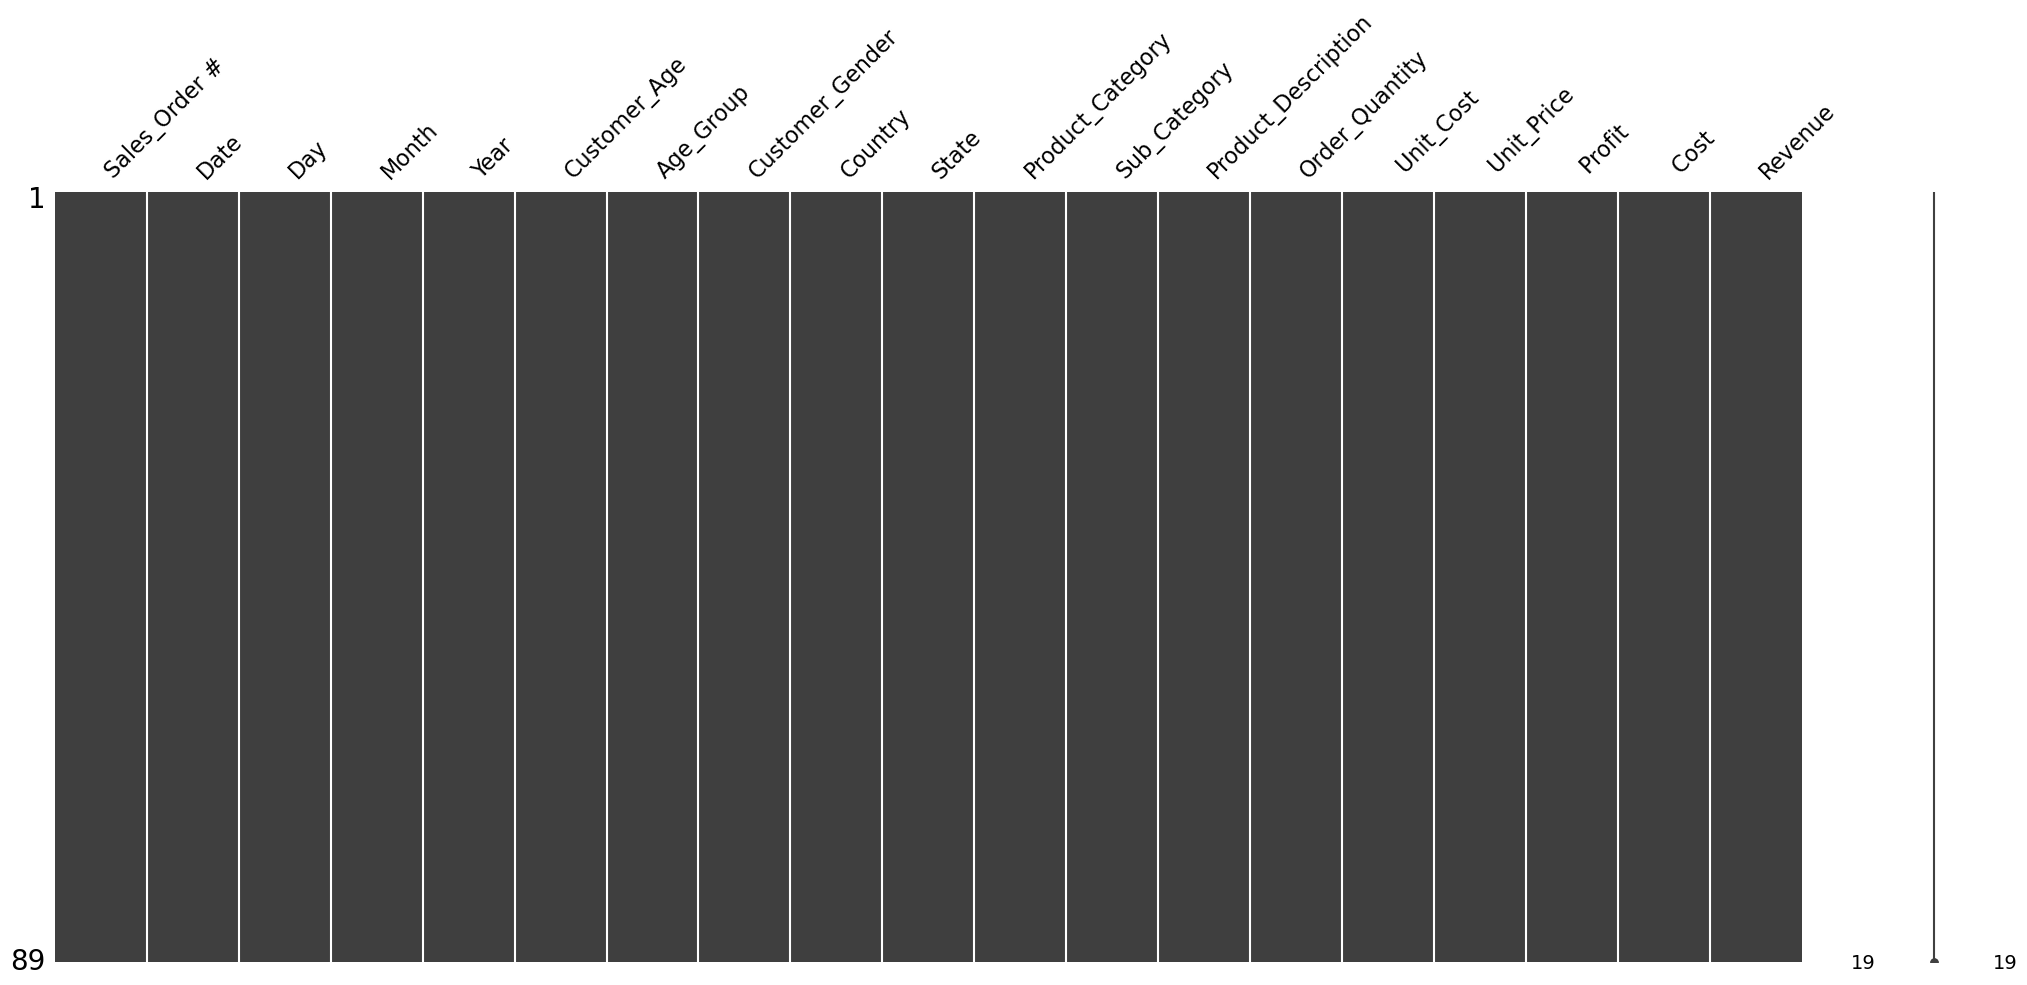

In [16]:
msno.matrix(consistent_df)
plt.show()

In [20]:
consistent_df.head()

,Sales_Order #,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product_Description,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,261695,2021-12-01,1.0,12,2021,39,Adults (35-64),F,United States,California,Bikes,Mountain Bikes,"Mountain-200 Black, 46",4.0,1252,2295,4172,5008,9180
1,261695,2021-12-01,1.0,12,2021,44,Adults (35-64),M,United Kingdom,England,Bikes,Mountain Bikes,"Mountain-200 Silver, 42",1.0,1266,2320,1054,1266,2320
2,261697,2021-12-02,2.0,12,2021,37,Adults (35-64),M,United States,California,Bikes,Mountain Bikes,"Mountain-400-W Silver, 46",2.0,420,769,698,840,1538
3,261698,2021-12-02,2.0,12,2021,31,Young Adults (25-34),F,Australia,New South Wales,Bikes,Mountain Bikes,"Mountain-400-W Silver, 42",1.0,420,769,349,420,769
4,261699,2021-12-03,3.0,12,2021,37,Adults (35-64),F,United States,California,Bikes,Mountain Bikes,"Mountain-200 Black, 46",2.0,0,2295,2086,0,4590


In [28]:
#stripping the columns off white spaces
consistent_df.columns = consistent_df.columns.str.strip()

In [31]:
value_df=consistent_df[['Order_Quantity', 'Unit_Cost', 'Unit_Price', 'Profit', 'Cost', 'Revenue']]
value_df.head()

,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,4.0,1252,2295,4172,5008,9180
1,1.0,1266,2320,1054,1266,2320
2,2.0,420,769,698,840,1538
3,1.0,420,769,349,420,769
4,2.0,0,2295,2086,0,4590


In [35]:
                                                #confirming cross field validation of consistent value data frame

#option 1: finding the original cost, revenue and profit diffrences
cost_cfv= consistent_df['Order_Quantity'] * consistent_df['Unit_Cost']
price_cfv= consistent_df['Order_Quantity'] * consistent_df['Unit_Price']
diffrences= consistent_df['Revenue'] - consistent_df['Cost']

#option 2: Comparing
comparing_cost_cfv= cost_cfv == consistent_df['Cost']
comparing_price_cfv= price_cfv == consistent_df['Revenue']
profit_comp= diffrences == consistent_df['Profit']

#option 3: getting inconsistent data
inconsistent_cost= consistent_df[~comparing_cost_cfv]
inconsistent_price= consistent_df[~comparing_price_cfv]
inconsistent_diffrences= consistent_df[~profit_comp]
print(f'Inconsistency found are: {inconsistent_cost.shape[0]} cost, {inconsistent_price.shape[0]} price, {inconsistent_diffrences.shape[0]} profit_diffrences')

#option 4: getting consistent data
consistent_cost= consistent_df[comparing_cost_cfv]
consistent_price= consistent_df[comparing_price_cfv]
consistent_diffrences= consistent_df[profit_comp]
print(f'Consistency found are: {consistent_cost.shape[0]} cost, {consistent_price.shape[0]} price, {consistent_diffrences.shape[0]} profit_diffrences')

#option 5: concating the consistent values into a final dataframe
over_final_cons= consistent_df[comparing_cost_cfv & comparing_price_cfv & profit_comp]
print(f'Final consistent data: {over_final_cons.shape[0]}')

Inconsistency found are: 1 cost, 1 price, 3 profit_diffrences
Consistency found are: 88 cost, 88 price, 86 profit_diffrences
Final consistent data: 86


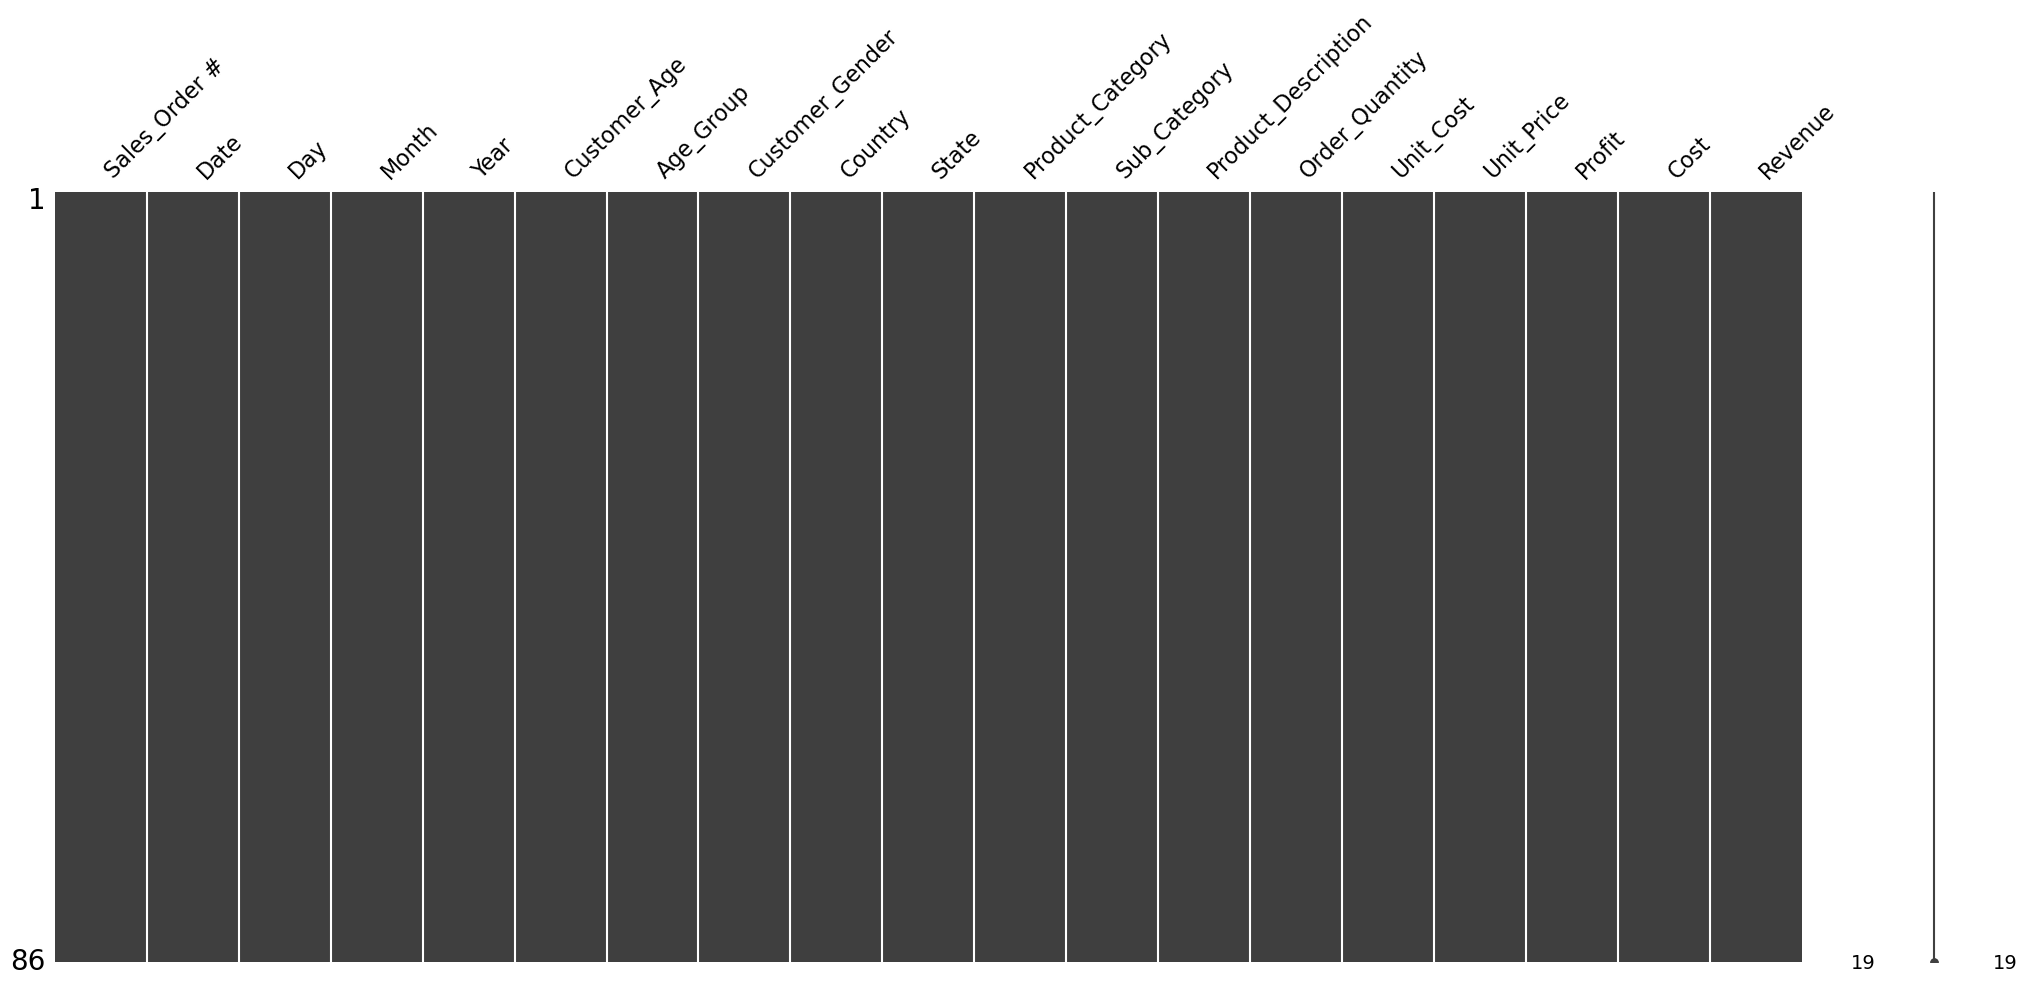

In [43]:
#Overall final dataframe
#over_final_cons.head()
msno.matrix(over_final_cons)
plt.show()

In [47]:
#downloading the overall cleaned data
over_final_cons.to_csv('Bike_Sales_finale.csv', index=False)